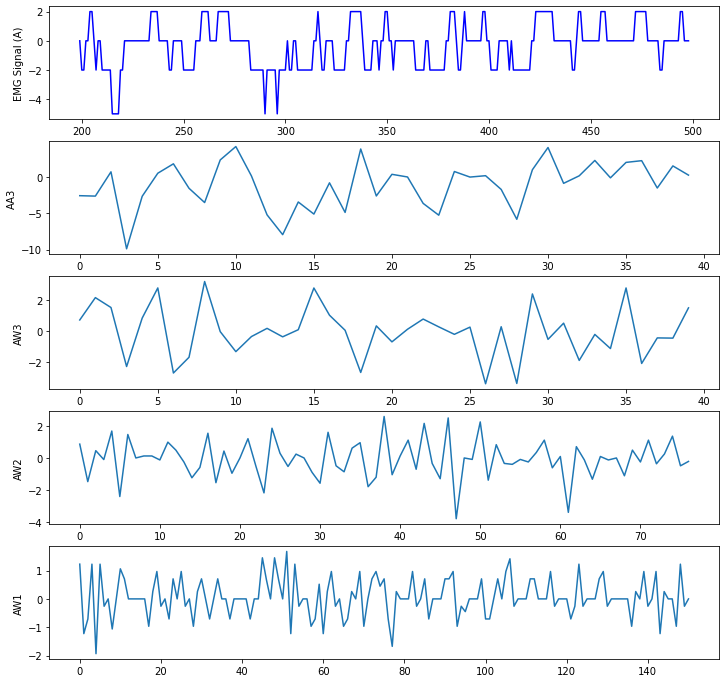

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import math


data =  pd.read_csv(R'D:\chinmay\6thsem\ml\HPID_19\Train\Subtrain/deven-standing-4.csv')

data_A = data.iloc[199:499,3]
A_coeffs = pywt.wavedec(data_A, 'db2', level=3)
AA3, AW3, AW2, AW1 = A_coeffs

fig, axs = plt.subplots(5, figsize=(12,12))
axs[0].plot(data_A,'b')
axs[0].set_ylabel('EMG Signal (A)')
axs[1].plot(AA3)
axs[1].set_ylabel('AA3')
axs[2].plot(AW3)
axs[2].set_ylabel('AW3')
axs[3].plot(AW2)
axs[3].set_ylabel('AW2')
axs[4].plot(AW1)
axs[4].set_ylabel('AW1')

plt.show()

In [188]:
def notch_filter(x, samplerate, plot=False):
 
    x = x - np.mean(x)

    high_cutoff_notch = 49 / (samplerate / 2)
    low_cutoff_notch = 51 / (samplerate / 2)

    # Band Stop Filter (BSF) or Band Reject Filter
    [b, a] = signal.butter(4, [high_cutoff_notch, low_cutoff_notch], btype='stop')

    x_filt = signal.filtfilt(b, a, x.T)

    if plot:
        t = np.arange(0, len(x) / samplerate, 1 / samplerate)
        plt.plot(t, x)
        plt.plot(t, x_filt.T, 'k')
        plt.legend(['Original', 'Filtered'], loc = 'best')
        plt.autoscale(tight=True)
        plt.xlabel('Time')
        plt.ylabel('Amplitude (mV)')
        plt.show()

    return x_filt


def bp_filter(x, low_f, high_f, samplerate, plot=False):
    # x = x - np.mean(x)

    low_cutoff_bp = low_f / (samplerate / 2)
    high_cutoff_bp = high_f / (samplerate / 2)

    [b, a] = signal.butter(5, [low_cutoff_bp, high_cutoff_bp], btype='bandpass')

    x_filt = signal.filtfilt(b, a, x)
    #print(len(x))

    if plot:
        t = np.arange(0, len(x.transpose()) / samplerate, 1 / samplerate)
        plt.plot(t, x.transpose())
        plt.plot(t, x_filt.transpose(), 'k')
        plt.legend(['Original', 'Filtered'], loc = 'best')
        plt.autoscale(tight=True)
        plt.xlabel('Time')
        plt.ylabel('Amplitude (mV)')
        plt.show()

    return x_filt

In [189]:
def plot_freq_band (data_in):
    fs = 512                                # Sampling rate (512 Hz)
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(data_in))
    
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data_in), 1.0/fs)
    #print(fft_freq)
    # Define EEG bands
    eeg_bands = {' 0 - 10Hz': (0, 10),
                 '11 - 20Hz': (11, 20),
                 '21 - 30Hz': (21, 30),
                 '31 - 40Hz': (31, 40),
                 '41 - 50Hz': (41, 50)}
                # '45 to 100 Hz':(45,100),
                 #'101 to 200 Hz':(101,200)}

    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    # Plot the data (using pandas here cause it's easy)
    import pandas as pd
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EMG band")
    ax.set_ylabel("Mean band Amplitude")
    print(df)

        band          val
0   0 - 10Hz  1923.169495
1  11 - 20Hz   460.170530
2  21 - 30Hz   200.773394
3  31 - 40Hz   149.194598
4  41 - 50Hz   117.681614


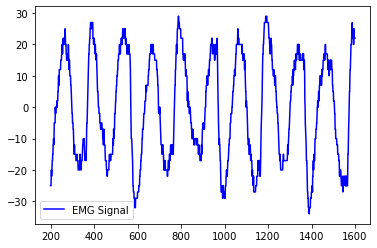

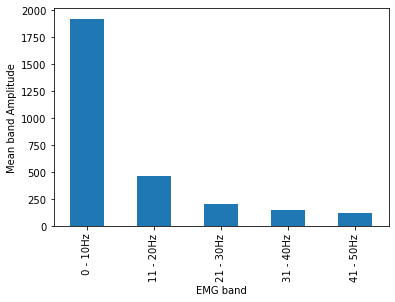

In [190]:

import scipy
import scipy.signal
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

data =  pd.read_csv(r'D:\chinmay\6thsem\ml\HPID_19\Train\Subtrain/deven-standing-4.csv')
#data =  pd.read_csv('C:/Users/ajay/Documents/EEG_Emotion/EEG_Emotion_data/Disgust_state.csv')
#data =  pd.read_csv('C:/Users/ajay/Documents/EEG_Emotion/EEG_Emotion_data/Happy_state.csv')
#data =  pd.read_csv('C:/Users/ajay/Documents/EEG_Emotion/EEG_Emotion_data/subjectb-relaxed-1.csv')


data_A = data.iloc[200:3799,2]
plt.clf()
plt.plot(data_A,'b')
plt.legend(['EMG Signal'], loc = 'best')
plot_freq_band (data_A)
#plt.clf()


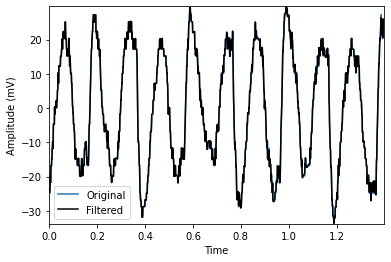

        band          val
0   0 - 10Hz  1912.270576
1  11 - 20Hz   457.863582
2  21 - 30Hz   206.107845
3  31 - 40Hz   151.454141
4  41 - 50Hz   118.880312


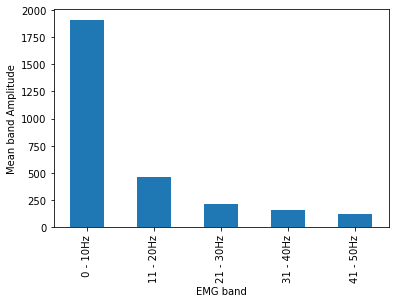

In [191]:
notch_out = notch_filter(data_A, samplerate=1000, plot=True)
#plt.clf()
plot_freq_band (notch_out)
#plt.clf()

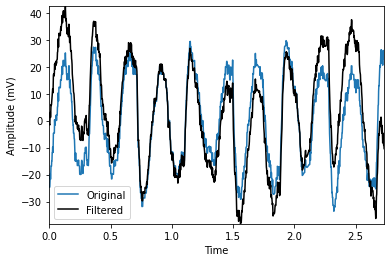

        band          val
0   0 - 10Hz  2496.689668
1  11 - 20Hz   422.781062
2  21 - 30Hz   124.622467
3  31 - 40Hz   106.513390
4  41 - 50Hz    65.233016


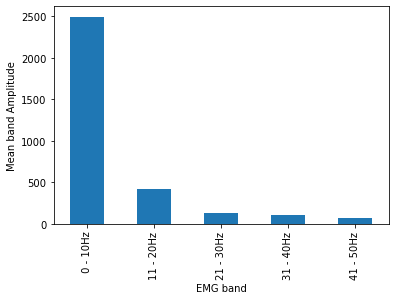

In [192]:
bp_out =  bp_filter(notch_out, low_f=.5, high_f=200, samplerate=512, plot=True)
#plt.clf()
plot_freq_band (bp_out)





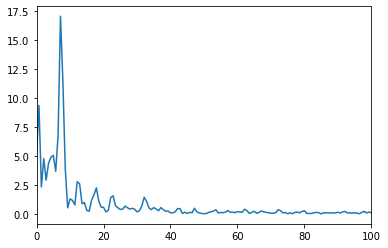

In [193]:
#Power spectral density
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
x= bp_out
dt = 0.001
#X = fft(x)
X=fft(x)/len(x)
freq = fftfreq(x.size, d=dt)

# Only keep positive frequencies.
keep = freq>=0
#X = X[keep]
X=X[keep]*2
freq = freq[keep]

ax1 = plt.subplot(111)
ax1.plot(freq, np.absolute(X))#/3000.)
ax1.set_xlim(0,100)

plt.show()

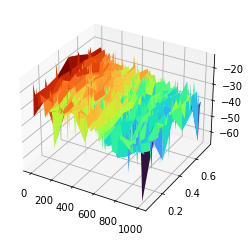

In [194]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal # spectrogram function
from matplotlib import cm # colour map

mysignal =data.iloc[:,1] # CHANGE THE SIGNAL AND SEE PLOT

# basic config
sample_rate = 2000 #11240.  # 
sig_len_secs = 10
frequency = 2000.

# generate thetimepoint
timestamps_secs = np.arange(sample_rate*sig_len_secs) / sample_rate


# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(mysignal, sample_rate)

# 3d plot

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = plt.subplot(1,1,1,projection="3d"); 
ax.plot_surface(freq_bins[:, None], timestamps[None, :], 10.0*np.log10(spec), cmap=cm.turbo)
plt.show()


(1500,)


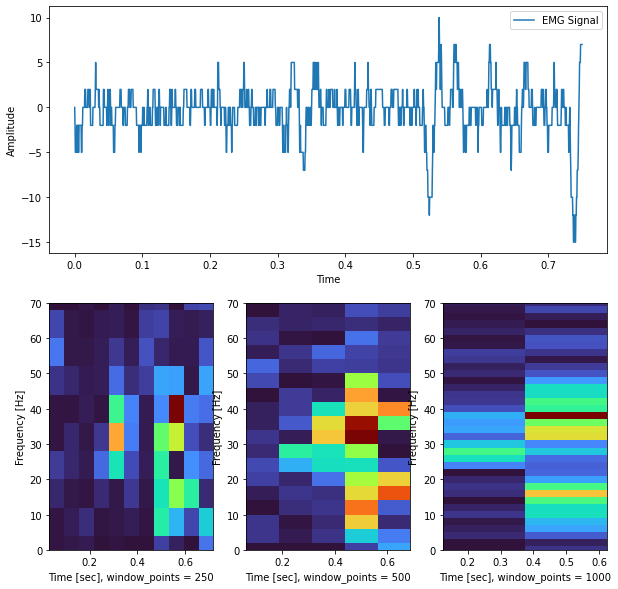

In [195]:
#https://stackoverflow.com/questions/72181057/what-is-the-ideal-parameters-for-spectrogram-of-eeg-signal
#Windowing of signal for analysis and discussion of no of datapoints 
# We clim 500 to be the ideal number of data points 
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#y_data = np.genfromtxt('signal_value_spectro.csv', delimiter=',',skip_header=0)

Oz=data.iloc[100:1999,3]#
fs = 2000
t = np.arange(len(Oz))/fs

print(t.shape)
# nperseg = len(Oz[0])-1
#nperseg=50
#f50, t50, Sxx_50 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg-1,window=signal.get_window('hann',nperseg))
#nperseg=150
#f150, t150, Sxx_150 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg-1,window=signal.get_window('hann',nperseg))
#nperseg=350
#f350, t350, Sxx_350 = signal.spectrogram(Oz, fs, nperseg=nperseg , noverlap=nperseg-1,window=signal.get_window('hann',nperseg))

nperseg=250
f250, t250, Sxx_250 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=500
f500, t500, Sxx_500 = signal.spectrogram(Oz, fs, nperseg=nperseg , noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=1000
f1000, t1000, Sxx_1000 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
#50% OVERLAP FOR ALL 3 
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(len(Oz))/fs,Oz)  
plt.legend(['EMG Signal'], loc = 'best')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.subplot(234)
plt.pcolormesh(t250, f250, Sxx_250, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 250')
plt.subplot(235)
plt.pcolormesh(t500, f500, Sxx_500, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 500')
plt.subplot(236)
plt.pcolormesh(t1000, f1000, Sxx_1000, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], window_points = 1000')


plt.show()

(1500,)


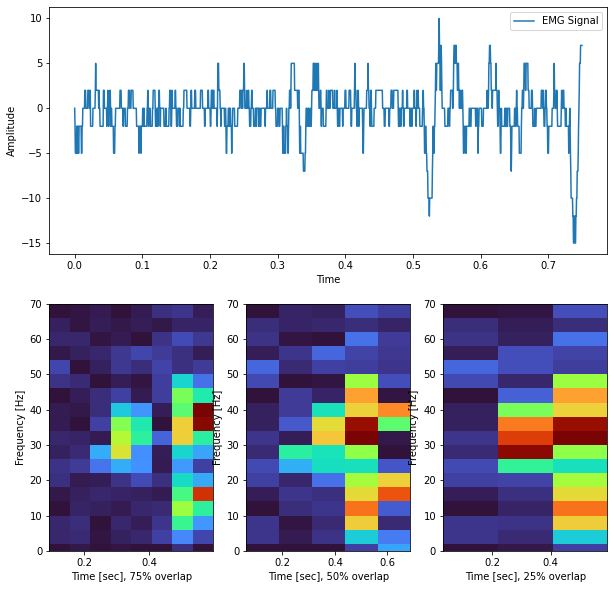

In [196]:
#https://stackoverflow.com/questions/72181057/what-is-the-ideal-parameters-for-spectrogram-of-eeg-signal
#  overlapping of signal analysis and discussion of lenght of overlapping window
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#y_data = np.genfromtxt('signal_value_spectro.csv', delimiter=',',skip_header=0)

Oz=data.iloc[100:1999,3]#
fs = 2000
t = np.arange(len(Oz))/fs

print(t.shape)

nperseg=500
f250, t250, Sxx_250 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//1.334,window=signal.get_window('hann',nperseg))
nperseg=500
f500, t500, Sxx_500 = signal.spectrogram(Oz, fs, nperseg=nperseg , noverlap=nperseg//2,window=signal.get_window('hann',nperseg))
nperseg=500
f1000, t1000, Sxx_1000 = signal.spectrogram(Oz, fs, nperseg=nperseg ,noverlap=nperseg//4,window=signal.get_window('hann',nperseg))
#ALL 3 have  500 Datapoints 
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(np.arange(len(Oz))/fs,Oz)  
plt.legend(['EMG Signal'], loc = 'best')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.subplot(234)
plt.pcolormesh(t250, f250, Sxx_250, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 75% overlap')
plt.subplot(235)
plt.pcolormesh(t500, f500, Sxx_500, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 50% overlap')
plt.subplot(236)
plt.pcolormesh(t1000, f1000, Sxx_1000, shading='auto',cmap = 'turbo')
plt.ylim([0,70])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec], 25% overlap')


plt.show()

An appropriate amount of overlap will depend on the choice of window and on your requirements. In contrast to welch’s method, where the entire data stream is averaged over, one may wish to use a smaller overlap (or perhaps none at all) when computing a spectrogram, to maintain some statistical independence between individual segments. It is for this reason that the default window is a Tukey window with 1/8th of a window’s length overlap at each end.

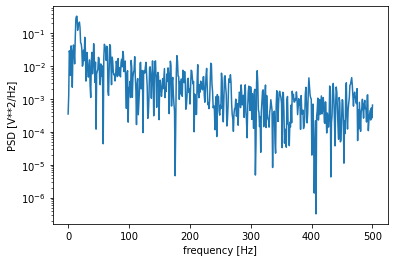

In [197]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
# default Hann window an overlap of 50% 
#Compute and plot the power spectral density.
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
fs = 1000
x=data.iloc[100:2999,3]
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

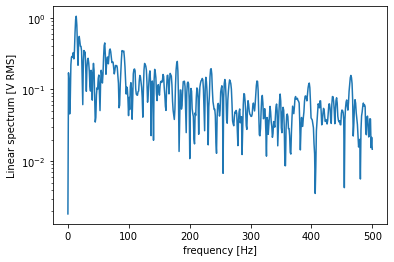

In [198]:
#compute and plot the power spectrum.
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()